In [ ]:
import numpy as np
import os
from PIL import Image
import cv2

In [ ]:
def compress_image_with_svd(image_path, compression_ratio):
    """
    Funkcja kompresuje obraz przy użyciu rozkładu SVD.
    
    Parametry:
    image_path (str): Ścieżka do pliku obrazu.
    compression_ratio (float): Współczynnik kompresji (wartość z zakresu 0-1).
    
    Zwraca:
    numpy.ndarray: Skompresowany obraz.
    """
    # Wczytanie obrazu
    image = Image.open(image_path)
    image_array = cv2.cvtColor(np.array(image).astype(np.float32), cv2.COLOR_BGR2GRAY).astype(np.uint8)
    print(image_array.shape) 

    # Wykonanie rozkładu SVD
    U, s, Vt = np.linalg.svd(image_array, full_matrices=False)
    
    # Kompresja obrazu
    compressed_s = s * compression_ratio
    compressed_image_array = np.dot(U, np.dot(np.diag(compressed_s), Vt))
    
    return compressed_image_array

def filter_singular_values(image_array, filter_function):
    """
    Funkcja filtruje wartości osobliwe obrazu.
    
    Parametry:
    image_array (numpy.ndarray): Obraz w postaci tablicy numpy.
    filter_function (callable): Funkcja filtrująca wartości osobliwe.
    
    Zwraca:
    numpy.ndarray: Obraz z zmodyfikowanymi wartościami osobliwymi.
    """
    U, s, Vt = np.linalg.svd(image_array, full_matrices=False)
    filtered_s = filter_function(s)
    filtered_image_array = np.dot(U, np.dot(np.diag(filtered_s), Vt))
    
    return filtered_image_array

# Przykładowa funkcja filtrująca (zwiększa wartości osobliwe)
def increase_singular_values(s):
    return s * 1.5


def compress_and_filter_image(image_path, compression_ratio, filter_function):
    """
    Funkcja kompresuje i filtruje obraz.
    
    Parametry:
    image_path (str): Ścieżka do pliku obrazu.
    compression_ratio (float): Współczynnik kompresji (wartość z zakresu 0-1).
    filter_function (callable): Funkcja filtrująca wartości osobliwe.
    """
    compressed_image_array = compress_image_with_svd(image_path, compression_ratio)
    filtered_image_array = filter_singular_values(compressed_image_array, filter_function)
    
    # Zapisanie zmodyfikowanego obrazu
    filtered_image = Image.fromarray(filtered_image_array.astype(np.uint8))
    filtered_image.save(f"filtered_{os.path.basename(image_path)}")
    


In [ ]:
compress_and_filter_image("image3.jpg", 0.1, increase_singular_values)

In [245]:
def calculSigma(M): 
    if (np.size(np.dot(M, M.T)) > np.size(np.dot(M.T, M))): 
        newM = np.dot(M.conj().T, M) 
    else: 
        newM = np.dot(M, M.conj().T) 
        
    eigenvalues, _ = np.linalg.eig(newM) 
    eigenvalues = np.sqrt(eigenvalues) 

    eigenvalues = np.sort(eigenvalues)
    
    return eigenvalues[::-1] 

In [252]:
def calculVt(M): 
    B = np.dot(M.conj().T, M)
        
    eigenvalues, eigenvectors = np.linalg.eig(B) 
    ncols = np.argsort(eigenvalues)[::-1] 
    
    return eigenvectors[:,ncols].conj().T 

In [248]:
def calculU(M): 
    B = np.dot(M, M.conj().T) 
        
    eigenvalues, eigenvectors = np.linalg.eig(B) 
    ncols = np.argsort(eigenvalues)[::-1] 
    
    return eigenvectors[:,ncols] 

In [253]:
A = np.array([[4,2,0],[1,5,6]])
U, sigma, V_T = np.linalg.svd(A)
print(U)
print(sigma)
print(V_T)

[[ 0.28978415 -0.95709203]
 [ 0.95709203  0.28978415]]
[8.13872588 3.97003036]
[[ 0.26001965  0.65919758  0.70558368]
 [-0.89132415 -0.11719389  0.43795758]
 [ 0.37139068 -0.74278135  0.55708601]]


In [170]:
def SVDecomposition(M): 
    U = calculU(M) 
    S = calculSigma(M) 
    Vt = calculVt(M) 
    return U, S, Vt

In [254]:
A = np.array([[4,2,0],[1,5,6]])

U, Sigma, Vt = SVDecomposition(A)
print(U)
print(Sigma)
print(Vt)

[[-0.28978415 -0.95709203]
 [-0.95709203  0.28978415]]
[8.13872588 3.97003036]
[[-0.26001965 -0.65919758 -0.70558368]
 [-0.89132415 -0.11719389  0.43795758]
 [ 0.37139068 -0.74278135  0.55708601]]


/tmp/ipykernel_31755/2398926973.py:27: ComplexWarning: Casting complex values to real discards the imaginary part
  V_T = V_T.astype(np.float64)


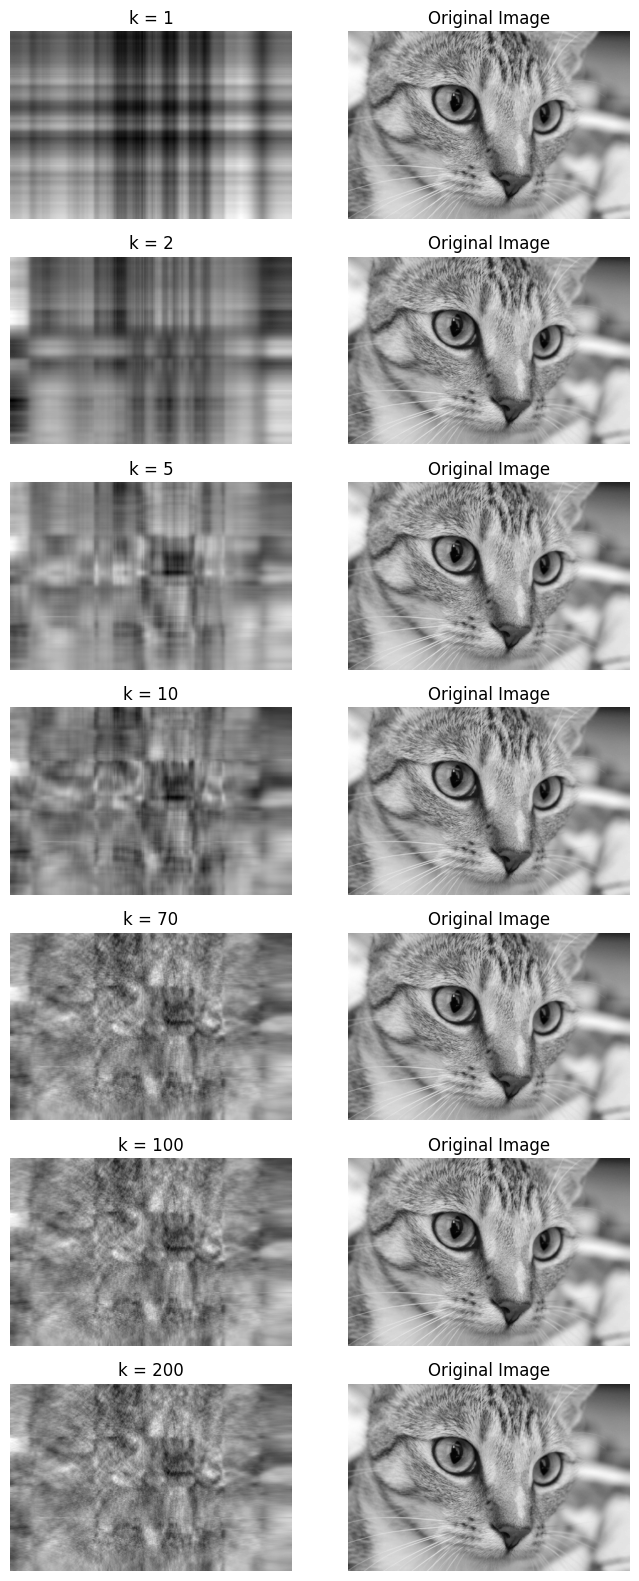

In [264]:
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data

def ObrazRed(iteracje,u,s,v):
    Ali=[]
    uli=list(u.transpose())
    vli=list(v)
    Ms=u.shape[0]
    Ns=v.shape[0]
    Appr=np.zeros((Ms,Ns))
    for i in range(0,iteracje):
        ui=np.matrix(uli[i]).transpose()
        vi=np.matrix(vli[i])
        Ali.append(ui.dot(vi))
        Appr=Appr+s[i]*(ui.dot(vi))
    return Appr

def kompr(it,Ms,Ns):
    return 1-it*(Ms+Ns+1)/(Ms*Ns)*1.0

cat = data.chelsea()
image_array = rgb2gray(cat)

#my
U, S, V_T = SVDecomposition(image_array)
V_T = V_T.astype(np.float64)


U_, S_, V_T_ = np.linalg.svd(image_array, full_matrices=False)


#check close

S = np.diag(S)


fig, ax = plt.subplots(7, 2, figsize=(8, 20))
 
curr_fig = 0
for r in [1, 2, 5, 10, 70, 100, 200]:
    cat_approx = U[:, :r] @ S[0:r, :r] @ V_T[:r, :]
    ax[curr_fig][0].imshow(cat_approx, cmap='gray')
    ax[curr_fig][0].set_title("k = "+str(r))
    ax[curr_fig, 0].axis('off')
    ax[curr_fig][1].set_title("Original Image")
    ax[curr_fig][1].imshow(image_array, cmap='gray')
    ax[curr_fig, 1].axis('off')
    curr_fig += 1
plt.show()


In [34]:
# svd with numpy

U, s, Vt = np.linalg.svd(A, full_matrices=True)
print(U)
print(s)
print(Vt)

[[ 0.28978415 -0.95709203]
 [ 0.95709203  0.28978415]]
[8.13872588 3.97003036]
[[ 0.26001965  0.65919758  0.70558368]
 [-0.89132415 -0.11719389  0.43795758]
 [ 0.37139068 -0.74278135  0.55708601]]


In [ ]:
def compress_image_with_svd(image_path, compression_ratio):
    image = Image.open(image_path)
    image_array = cv2.cvtColor(np.array(image).astype(np.float32), cv2.COLOR_BGR2GRAY).astype(np.uint8)

    U, s, Vt = SVDecomposition(image_array)
    
    compressed_s = s * compression_ratio
    compressed_image_array = np.dot(U, np.dot(np.diag(compressed_s), Vt))
    
    return compressed_image_array

def filter_singular_values(image_array, filter_function):
    
    U, s, Vt = SVDecomposition(image_array)
    filtered_s = filter_function(s)
    filtered_image_array = np.dot(U, np.dot(np.diag(filtered_s), Vt))
    
    return filtered_image_array

def increase_singular_values(s):# Przykładowa funkcja filtrująca (zwiększa wartości osobliwe)
    return s * 1.5

def compress_and_filter_image(image_path, compression_ratio, filter_function):
    
    compressed_image_array = compress_image_with_svd(image_path, compression_ratio)
    filtered_image_array = filter_singular_values(compressed_image_array, filter_function)
    
    filtered_image = Image.fromarray(filtered_image_array.astype(np.uint8))
    filtered_image.save(f"filtered_{os.path.basename(image_path)}")

compress_and_filter_image("image3.jpg", 0.9, increase_singular_values)
    


In [164]:
import scipy

def svd(M, tol=1e-7):
    if (np.size(np.dot(M, M.T)) > np.size(np.dot(M.T, M))): 
        newM = np.dot(M.T, M) 
    else: 
        newM = np.dot(M, M.T) 
     
    # 2: λ, V ← eig(AHA)
    lambda_, V = np.linalg.eig(A @ A.conj().T)
    
    # 3: σ ← √λ
    sigma = np.sqrt(lambda_)
    

    # 4: σ ← sort(σ)
    idx = np.argsort(-sigma)  # sort in descending order
    
    sigma = sigma[idx]
    V = V[:, idx]
    
    # 5: r ← count(σ > tol)
    r = np.count_nonzero(sigma)

    # 6: σ1 ← σ:r
    
    sigma1 = sigma[:r]
    
    # 7: V1 ← V:,:r
    V1 = V[:, :r]
    
    # 8: U1 ← AV1/σ1
    U1 = np.dot(A, V1) / sigma1

    
    # 9: return U1, σ1, V1.H
    return U1, sigma1, V1.conj().T
